# Airbnb Project


"""

In this project, Seattle and Boston Airbnb data is used to understand how much Airbnb homes are earning 
in certain time frames and areas.

I will compare data between two cities, 
and try to understand if there is anything about the properties that helps me predict price. 

Three questions related to business or real-world applications of how the data could be used:

1. How many valid records to predict Boston / seattle Airbnb price;
2. Price distribution comparison;
3. Build a Multi Linear Regression model to predict price

"""

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Boston

In [157]:
BostonListingDF = pd.read_csv('./listingsBoston.csv')
BostonListingDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [158]:
# Gather necessary data
BostonDF = BostonListingDF[['room_type','beds','price']]

Question 1. How many records for Boston Airbnb

In [159]:
# How many records for Boston Airbnb
BostonDF.shape[0]

3585

In [160]:
BostonDF.shape[1]

3

In [161]:
BostonDF.head()

,room_type,beds,price
0,Entire home/apt,3.0,$250.00
1,Private room,1.0,$65.00
2,Private room,1.0,$65.00
3,Private room,2.0,$75.00
4,Private room,2.0,$79.00


In [162]:
# convert column 'price' to float
BostonDF[BostonDF.columns[2]]=BostonDF[BostonDF.columns[2]].replace('[\$,]', '',regex=True).astype(float)

C:\Users\doxinxin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Question 2. Boston Airbnb Price Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D015D1F548>]],
      dtype=object)

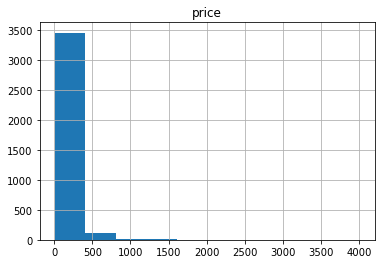

In [163]:
BostonDF.hist(column = "price")

In [164]:
BostonDF.describe()

,beds,price
count,3576.000000,3585.000000
mean,1.609060,173.925802
std,1.011745,148.331321
min,0.000000,10.000000
25%,1.000000,85.000000
50%,1.000000,150.000000
75%,2.000000,220.000000
max,16.000000,4000.000000


Question 3. Predict Boston Airbnb Price

In [165]:
 # Handle missing data

In [166]:
# provide a set of column names that have no missing values
no_nulls = set(BostonDF.columns[BostonDF.isnull().mean()==0])
no_nulls

{'price', 'room_type'}

In [167]:
# impute missing values with 1 
BostonDF = BostonDF.fillna(1)

In [168]:
no_nulls = set(BostonDF.columns[BostonDF.isnull().mean()==0])
no_nulls

{'beds', 'price', 'room_type'}

In [169]:
BostonDF

,room_type,beds,price
0,Entire home/apt,3.0,250.0
1,Private room,1.0,65.0
2,Private room,1.0,65.0
3,Private room,2.0,75.0
4,Private room,2.0,79.0
...,...,...,...
3580,Private room,1.0,69.0
3581,Private room,1.0,150.0
3582,Entire home/apt,1.0,198.0
3583,Private room,1.0,65.0


In [170]:
 # Handle categorical data

In [171]:
X = BostonDF.iloc[:, :-1].values

In [172]:
y = BostonDF.iloc[:, -1].values

In [173]:
from sklearn.compose import ColumnTransformer

In [174]:
from sklearn.preprocessing import OneHotEncoder

In [175]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough' )

In [176]:
X = np.array(ct.fit_transform(X))

In [177]:
print(X)

[[1.0 0.0 0.0 3.0]
 [0.0 1.0 0.0 1.0]
 [0.0 1.0 0.0 1.0]
 ...
 [1.0 0.0 0.0 1.0]
 [0.0 1.0 0.0 1.0]
 [0.0 1.0 0.0 1.0]]


In [ ]:
# Splitting the dataset into the training set and test set

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Training the multiple linear regression model on the training set

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
regressor = LinearRegression()

In [182]:
regressor.fit(X_train, y_train)

LinearRegression()

In [133]:
# Predicting the Test set results

In [183]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 86.15  67.  ]
 [229.03 299.  ]
 [ 88.8   75.  ]
 ...
 [ 88.8  125.  ]
 [ 88.8   95.  ]
 [ 88.8   45.  ]]


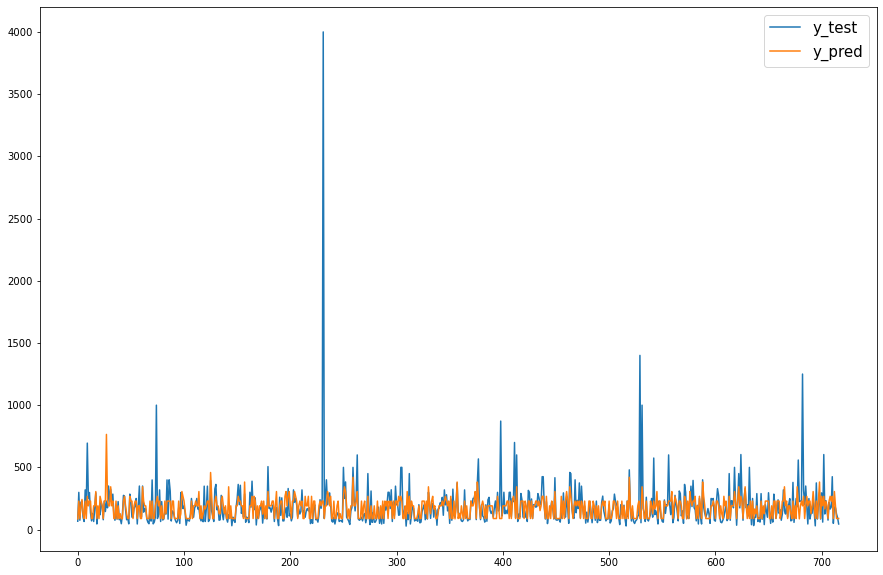

In [184]:
# Plot y_test and y_predict
d = {'y_test': y_test, 'y_pred': y_pred}
newdf = pd.DataFrame(data=d)
newdf.plot(figsize = (15,10))
plt.legend(fontsize=15)
plt.show()

In [186]:
# pvalue
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X_train, y_train)
pvalues=["{0:.7f}".format(x)for x in pvalues]
print(pvalues)

['0.0000000', '0.0000000', '0.0000000', '0.0000000']


# Seattle

In [197]:
SeattleListingDF = pd.read_csv('./listingsSeattle.csv')
SeattleListingDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [198]:
# Gather necessary data
SeattleDF = SeattleListingDF[['room_type','beds','price']]

Question 1. How many records for Seattle Airbnb

In [199]:
# How many records for Seattle Airbnb
SeattleDF.shape[0]

3818

In [200]:
SeattleDF.shape[1]

3

In [201]:
SeattleDF.head()

,room_type,beds,price
0,Entire home/apt,1.0,$85.00
1,Entire home/apt,1.0,$150.00
2,Entire home/apt,7.0,$975.00
3,Entire home/apt,2.0,$100.00
4,Entire home/apt,3.0,$450.00


In [202]:
 # Handle missing data

In [203]:
# provide a set of column names that have no missing values
no_nulls2 = set(SeattleDF.columns[SeattleDF.isnull().mean()==0])
no_nulls2

{'price', 'room_type'}

In [204]:
# How many records for Seattle Airbnb
SeattleDF.shape[0]

3818

In [205]:
dataTypeSeries = SeattleDF.dtypes
dataTypeSeries

room_type     object
beds         float64
price         object
dtype: object

In [206]:
# convert column 'price' to float
SeattleDF[SeattleDF.columns[2]]=SeattleDF[SeattleDF.columns[2]].replace('[\$,]', '',regex=True).astype(float)

C:\Users\doxinxin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Question 2. Seattle Airbnb Price Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D01DD1B4C8>]],
      dtype=object)

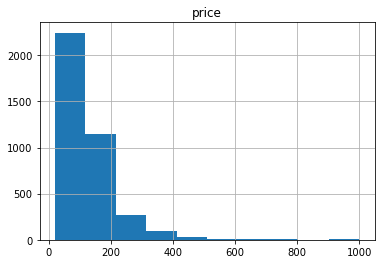

In [207]:
SeattleDF.hist(column = "price")

In [208]:
SeattleDF.describe()

,beds,price
count,3817.000000,3818.000000
mean,1.735394,127.976166
std,1.139480,90.250022
min,1.000000,20.000000
25%,1.000000,75.000000
50%,1.000000,100.000000
75%,2.000000,150.000000
max,15.000000,1000.000000


Question 3. Predict Boston Airbnb Price

In [209]:
# impute missing values with 1 
SeattleDF = SeattleDF.fillna(1)

In [210]:
no_nulls2 = set(SeattleDF.columns[SeattleDF.isnull().mean()==0])
no_nulls2

{'beds', 'price', 'room_type'}

In [211]:
SeattleDF

,room_type,beds,price
0,Entire home/apt,1.0,85.0
1,Entire home/apt,1.0,150.0
2,Entire home/apt,7.0,975.0
3,Entire home/apt,2.0,100.0
4,Entire home/apt,3.0,450.0
...,...,...,...
3813,Entire home/apt,3.0,359.0
3814,Entire home/apt,2.0,79.0
3815,Entire home/apt,1.0,93.0
3816,Entire home/apt,1.0,99.0


In [ ]:
 # Handle categorical data

In [212]:
X = SeattleDF.iloc[:, :-1].values
y = SeattleDF.iloc[:, -1].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough' )
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 1.0]
 [1.0 0.0 0.0 1.0]
 [1.0 0.0 0.0 7.0]
 ...
 [1.0 0.0 0.0 1.0]
 [1.0 0.0 0.0 1.0]
 [1.0 0.0 0.0 1.0]]


[[113.8  129.  ]
 [ 84.86  45.  ]
 [ 68.76  50.  ]
 ...
 [113.8  135.  ]
 [195.75 295.  ]
 [154.77 225.  ]]


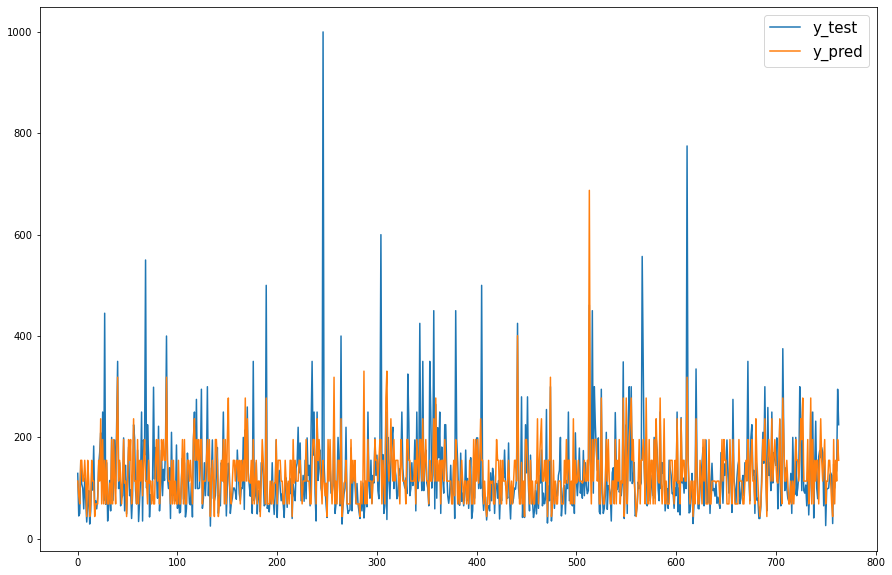

['0.0000000', '0.0000000', '0.0000000', '0.0000000']


In [213]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the multiple linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

# Plot y_test and y_predict
d = {'y_test': y_test, 'y_pred': y_pred}
newdf = pd.DataFrame(data=d)
newdf.plot(figsize = (15,10))
plt.legend(fontsize=15)
plt.show()

# pvalue
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X_train, y_train)
pvalues=["{0:.7f}".format(x)for x in pvalues]
print(pvalues)